In [1]:
import pandas as pd
import os

In [7]:
folder_path = r'C:\Users\crg74\Desktop\Cyclistic_CaseStudy_Data'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

csv_files[:5]

['202301-divvy-tripdata.csv',
 '202302-divvy-tripdata.csv',
 '202303-divvy-tripdata.csv',
 '202304-divvy-tripdata.csv',
 '202305-divvy-tripdata.csv']

In [8]:
import pandas as pd


all_data = pd.concat([
    pd.read_csv(os.path.join(folder_path, file)) for file in csv_files
], ignore_index=True)


print("Rows:", all_data.shape[0])
print("Columns:", all_data.shape[1])


all_data.head()


Rows: 5719877
Columns: 13


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,1/21/2023 20:05,1/21/2023 20:16,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,1/10/2023 15:37,1/10/2023 15:46,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,1/2/2023 7:51,1/2/2023 8:05,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,1/22/2023 10:52,1/22/2023 11:01,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,1/12/2023 13:58,1/12/2023 14:13,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [9]:

all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])


In [10]:

all_data['ride_length_minutes'] = (all_data['ended_at'] - all_data['started_at']).dt.total_seconds() / 60


In [11]:

all_data['day_of_week'] = all_data['started_at'].dt.day_name()


In [12]:

all_data = all_data[all_data['ride_length_minutes'] > 0]


In [13]:

print("Cleaned rows:", all_data.shape[0])
all_data[['ride_id', 'member_casual', 'ride_length_minutes', 'day_of_week']].head()


Cleaned rows: 5630927


,ride_id,member_casual,ride_length_minutes,day_of_week
0,F96D5A74A3E41399,member,11.0,Saturday
1,13CB7EB698CEDB88,member,9.0,Tuesday
2,BD88A2E670661CE5,casual,14.0,Monday
3,C90792D034FED968,member,9.0,Sunday
4,3397017529188E8A,member,15.0,Thursday


In [14]:
all_data.groupby('member_casual')['ride_length_minutes'].mean()


member_casual
casual    28.676988
member    12.727366
Name: ride_length_minutes, dtype: float64

In [15]:
all_data.groupby(['member_casual', 'day_of_week'])['ride_id'].count().unstack()


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,307230,231400,404554,330703,266520,242512,245361
member,522803,486898,465025,402425,580166,567822,577508


In [16]:
all_data.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean().unstack()


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,27.678147,28.123842,32.627765,33.357850,25.105392,25.465738,24.679872
member,12.689133,12.089834,14.173075,14.212668,12.215085,12.200730,12.132795


In [17]:
all_data.groupby(['member_casual', 'rideable_type'])['ride_id'].count().unstack()


rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,870140.0,77854.0,1080286.0
member,1801660.0,NaN,1800987.0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


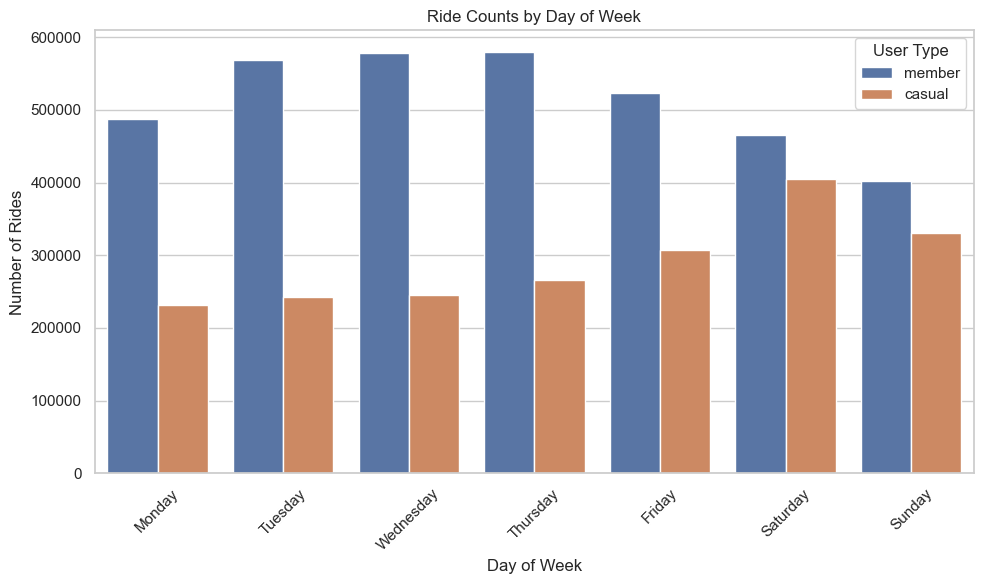

In [22]:

plt.figure(figsize=(10,6))
sns.countplot(data=all_data, x='day_of_week', hue='member_casual', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Ride Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ride_counts_by_day.png',dpi=300)
plt.show()


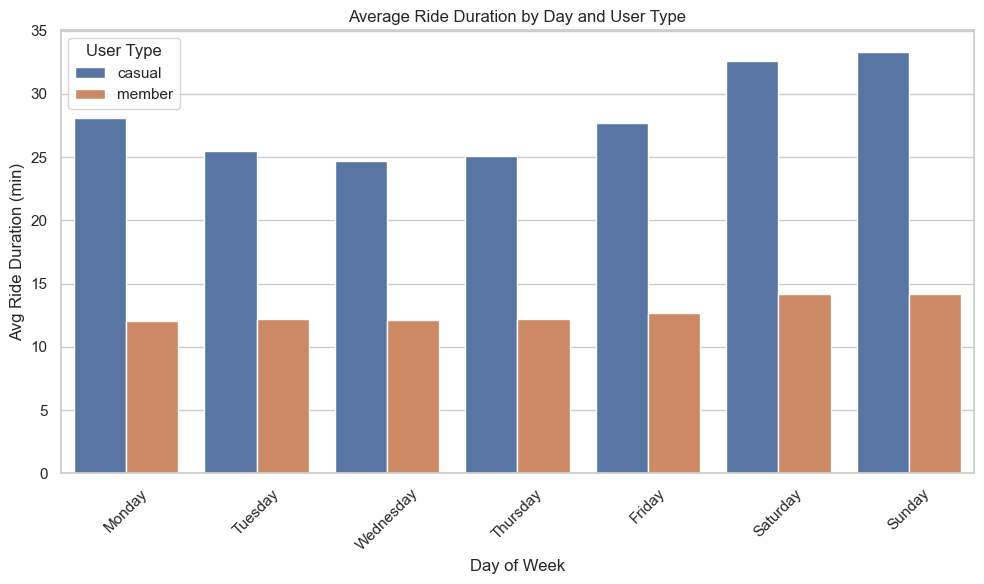

In [23]:

avg_ride = all_data.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_ride, x='day_of_week', y='ride_length_minutes', hue='member_casual',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Ride Duration by Day and User Type')
plt.ylabel('Avg Ride Duration (min)')
plt.xlabel('Day of Week')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average Ride Duration by Day and User Type', dpi=300)
plt.show()


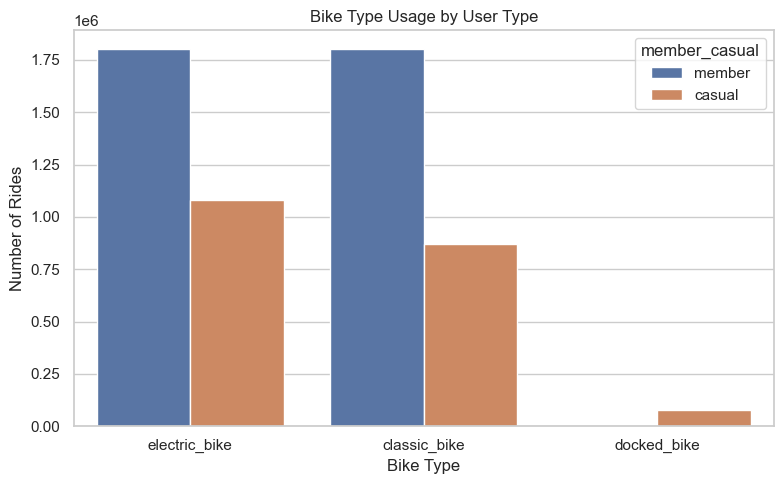

In [24]:

plt.figure(figsize=(8,5))
sns.countplot(data=all_data, x='rideable_type', hue='member_casual')
plt.title('Bike Type Usage by User Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.savefig('Bike Type Usage by User Type', dpi=300)
plt.show()
